In [2]:
#Reading Data from dataset

import pandas as pd

df = pd.read_csv("/Users/applemac/Downloads/NewLoan.csv")




/private/tmp/PKInstallSandbox.2dMVxt/tmp/ipykernel_61011/1060192683.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/applemac/Downloads/NewLoan.csv")


In [6]:
#Removing un-necessary columns from the dataset because
#mostly they contain unanimous values which does not add any value to further analysis


Removables = ['id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'zip_code', 'addr_state', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
df.drop(columns=Removables, inplace=True)


In [48]:
#Converting term to a numerical format for better analysis

df['term'] = df['term'].str.strip().replace({'36 months': '3', '60 months': '5'})


In [50]:
#I noticed that Verification_Status column contains redundant data, Lets merge it

df['verification_status'].replace({'Source Verified':'Verified'}, inplace=True)

In [13]:
#Converting interest rate to float value and removing the % sign

df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)


In [22]:
#Converting Term from Object to Integer

df['term']=pd.to_numeric(df['term'])

In [30]:
#Converting Issue_d & earliest_cr_line column to Date type

#df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')



In [37]:
#Removing % from Revol_util

df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)


In [38]:
#Converting last few date columns to date from objects
Object_to_Date=['last_pymnt_d','next_pymnt_d','last_credit_pull_d']
for Obj in Object_to_Date:
    df[Obj] = pd.to_datetime(df[Obj], format='%b-%y')


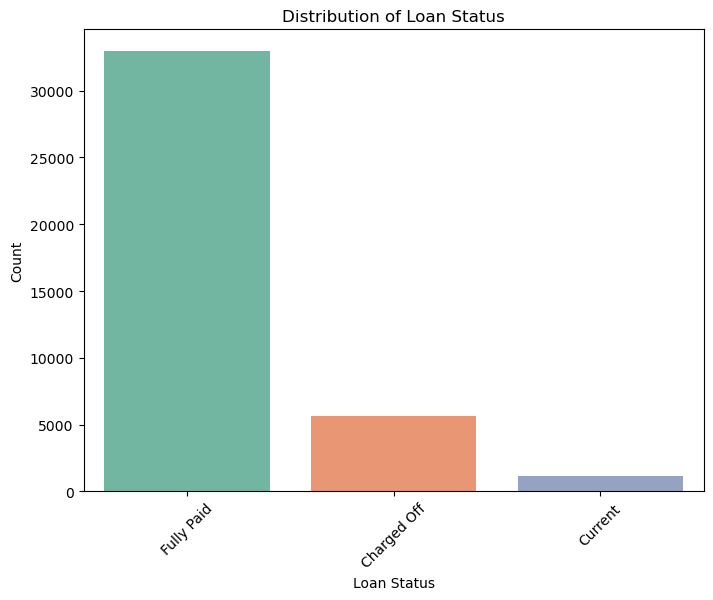

In [46]:
#Plotting a distribution of values according to Loan_Status

import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot to visualize the distribution of loan_status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

plt.show()

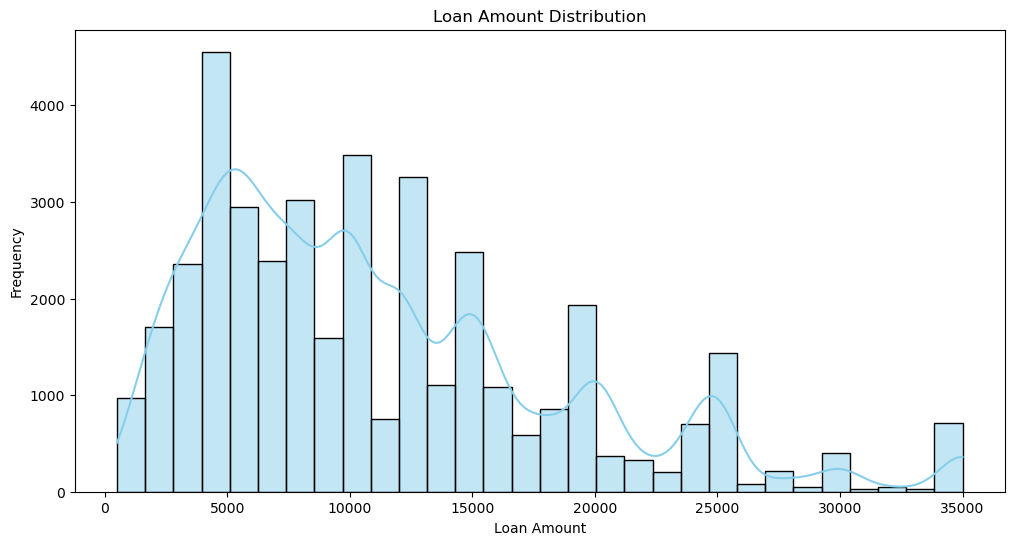

In [65]:
#If we see the frequency of loan amounts using univariate analysis, Following is the graph

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='loan_amnt', kde=True, color='skyblue', bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

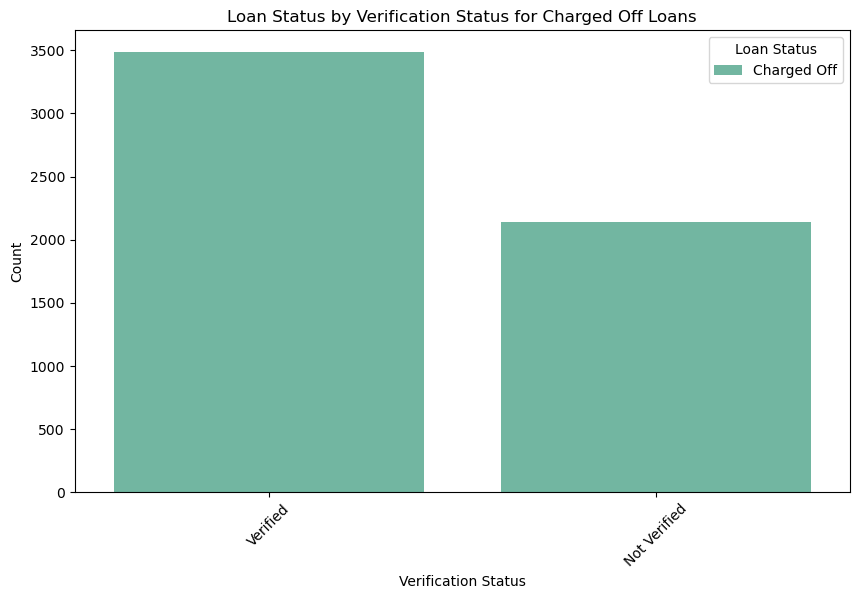

In [53]:
#This is strange finding that, Verified borrowers are more Charged Off than the Non Verified ones.


import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only 'Charged Off' loans
charged_off_df = df[df['loan_status'] == 'Charged Off']

# Create a bar plot to visualize the relationship between verification_status and loan_status
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='loan_status', data=charged_off_df, palette='Set2')

# Add labels and title
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Loan Status by Verification Status for Charged Off Loans')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to show the relationship between colors and loan statuses
plt.legend(title='Loan Status', loc='upper right')

plt.show()


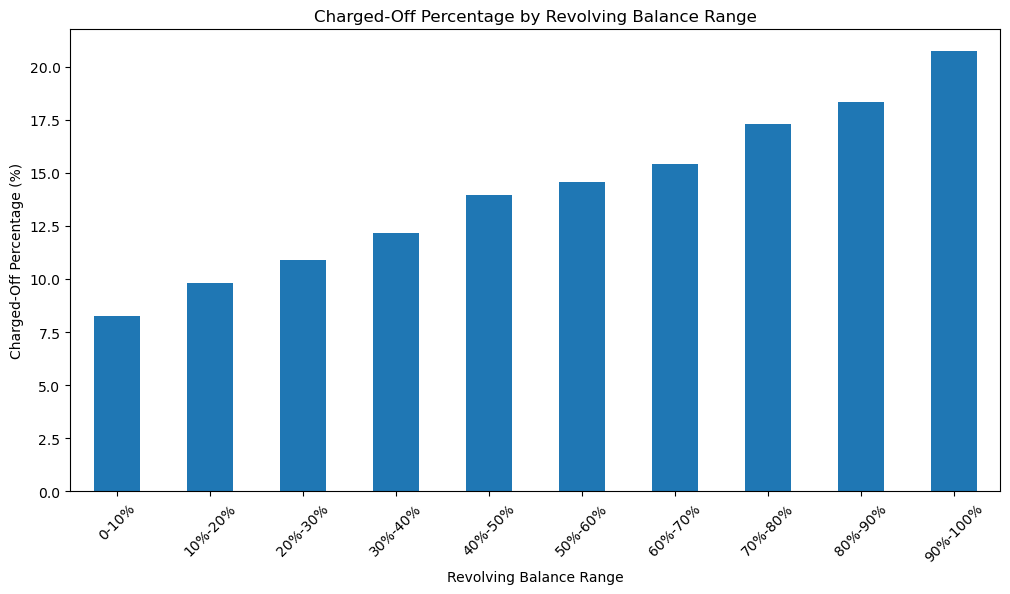

In [63]:
#I see a clear correlation between Revol_Util and Charged Off Percentage, Plotting a bar graph to showcase clearity

# Create bins for 'revol_bal' ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create labels for the bins
labels = ['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%']

# Create a new column 'revol_bal_range' to categorize 'revol_bal' into bins
df['revol_util_range'] = pd.cut(df['revol_util'], bins=bins, labels=labels)

# Calculate charged-off percentage for each 'revol_bal_range'
charged_off_percentage = df.groupby('revol_util_range')['loan_status'].value_counts(normalize=True).unstack().fillna(0)['Charged Off'] * 100

# Create a bar plot to visualize charged-off percentage by 'revol_bal_range'

plt.figure(figsize=(12, 6))
charged_off_percentage.plot(kind='bar')
plt.title('Charged-Off Percentage by Revolving Balance Range')
plt.xlabel('Revolving Balance Range')
plt.ylabel('Charged-Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()





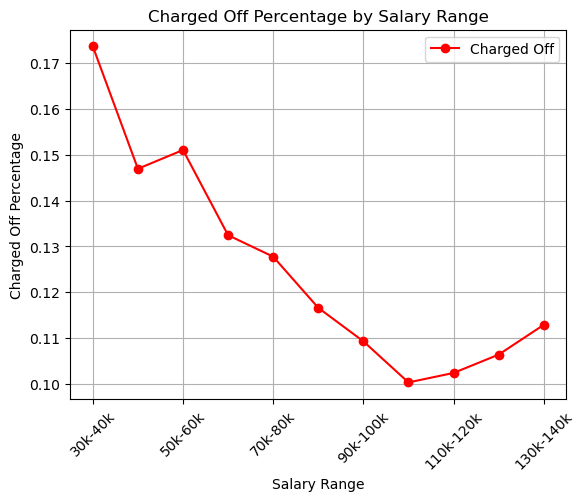

In [64]:
# Another very good insight is Charged Off cases decreases as the Salary increases.

# Aggregating salary data into income brackets
bins = [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000]
labels = ['30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-110k', '110k-120k', '120k-130k', '130k-140k']
df['salary_range'] = pd.cut(df['annual_inc'], bins=bins, labels=labels)

# Calculating "Charged Off" percentage by salary range
default_rates = df.groupby('salary_range')['loan_status'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the "Charged Off" percentage by salary range
default_rates['Charged Off'].plot(kind='line', marker='o', color='r', label='Charged Off')
plt.xlabel('Salary Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage by Salary Range')
plt.legend()
plt.xticks(rotation=45)
plt.grid()




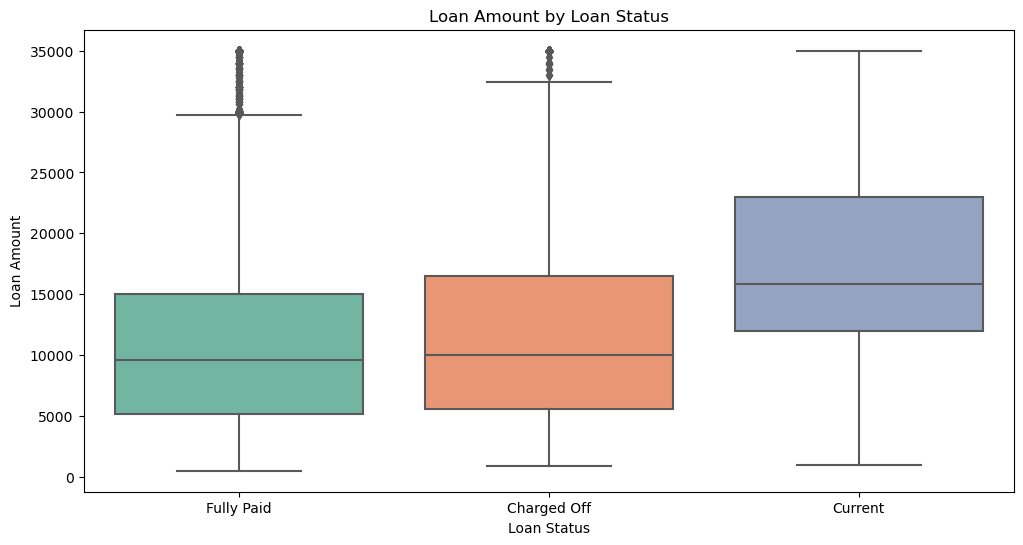

In [66]:
#A box plot of Loan Amount and Loan Status gives following insights
# 1. Distribution of loan amounts for "Charged Off" loans has a slightly higher median compared to "Fully Paid.
# 2. Higher loan amount increases the risk of defaulters

plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set2')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

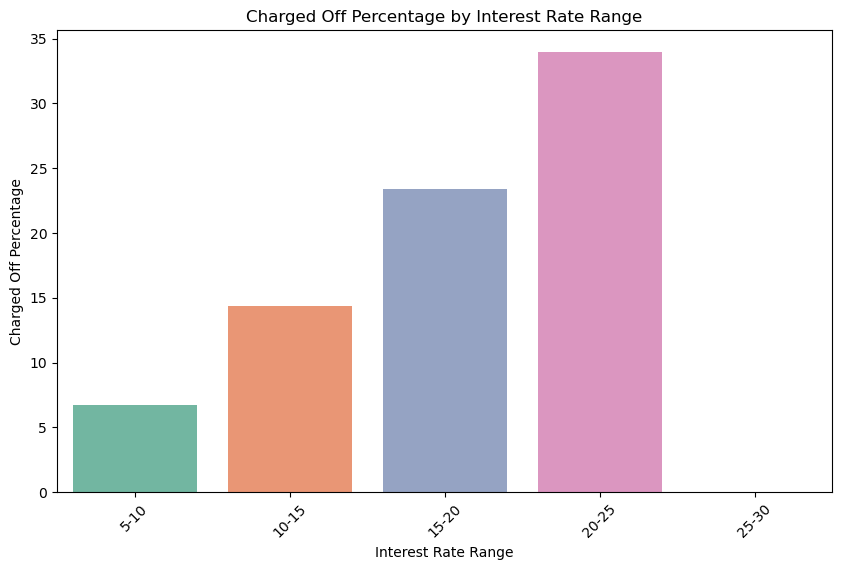

In [67]:
#Another insight I got from Interest Rate, I see that 20-25% is the most risky one.
#Also, As the Interest Rates and Defaulters go hand in hand.

import matplotlib.pyplot as plt
import seaborn as sns

# Define the bins and labels for the interest rate ranges
bins = [5, 10, 15, 20, 25, 30]
labels = ['5-10', '10-15', '15-20', '20-25', '25-30']

# Create a new column in the DataFrame to categorize interest rates into bins
df['int_rate_range'] = pd.cut(df['int_rate'], bins=bins, labels=labels)

# Calculate the charged-off percentage within each interest rate range
charged_off_rates = df[df['loan_status'] == 'Charged Off'].groupby('int_rate_range').size() / df.groupby('int_rate_range').size() * 100

# Create a bar plot to visualize the charged-off percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=charged_off_rates.index, y=charged_off_rates, palette='Set2')
plt.xlabel('Interest Rate Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage by Interest Rate Range')
plt.xticks(rotation=45)

plt.show()


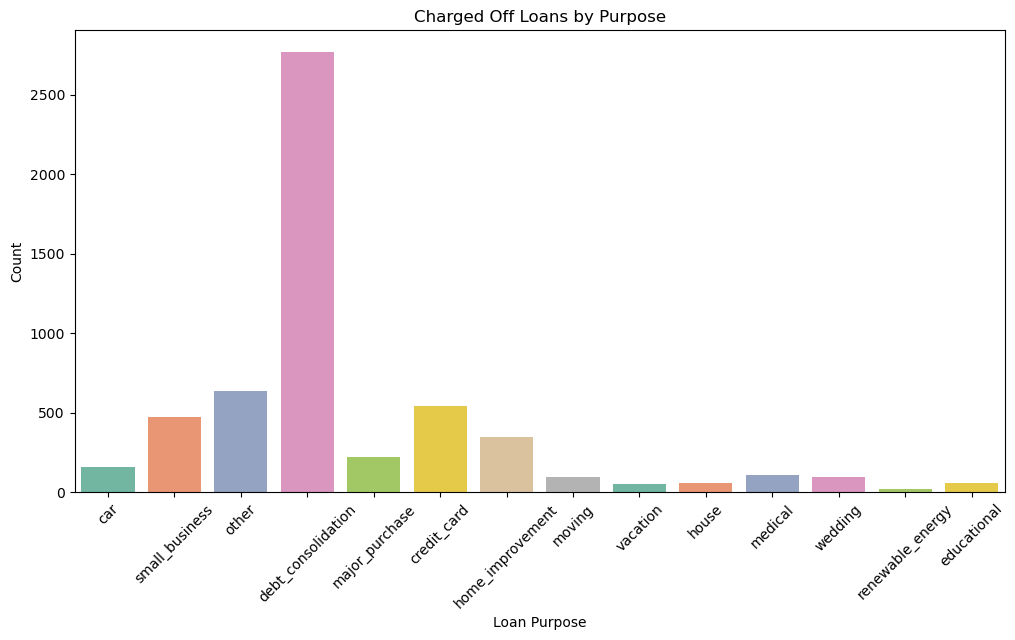

In [68]:
# We can clearly see that "debt_consolidation" has a long history with defaulters
# So, Approving loan for "Renewable Energy" or "Educational" purposes is safest.

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only 'Charged Off' loan statuses
charged_off_df = df[df['loan_status'] == 'Charged Off']

# Create a bar plot to visualize the distribution of 'Charged Off' loans by purpose
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=charged_off_df, palette='Set2')

# Add labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Charged Off Loans by Purpose')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


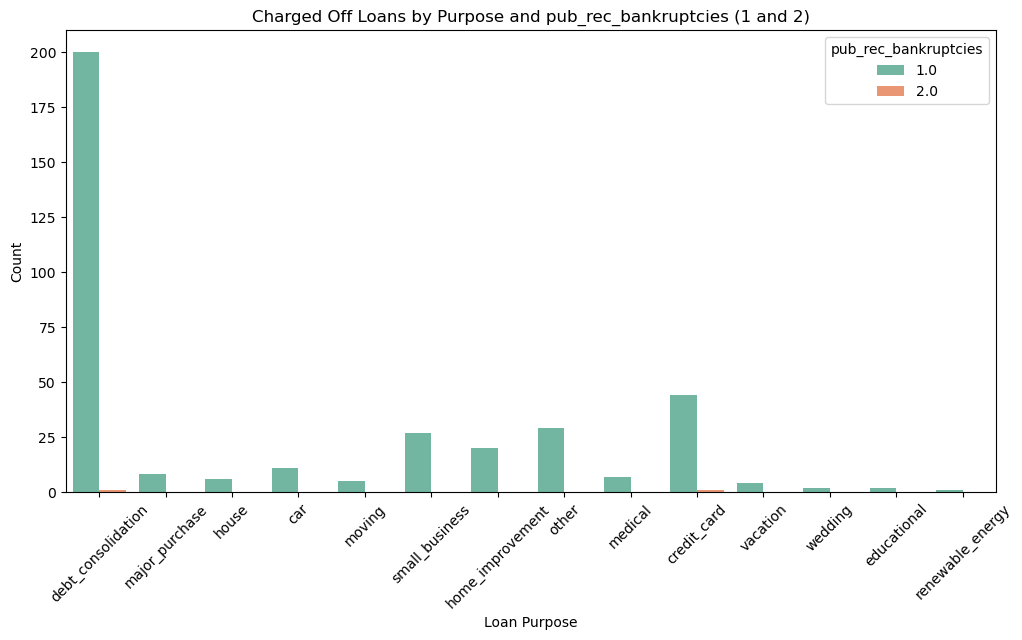

In [69]:
#On the very similar lines, We can see the "debt_consolidation" being associated with most number of public bankruptcy

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only 'Charged Off' loan statuses and 'pub_rec_bankruptcies' values of 1 and 2
charged_off_df = df[(df['loan_status'] == 'Charged Off') & (df['pub_rec_bankruptcies'].isin([1, 2]))]

# Create a bar plot to visualize the distribution of 'Charged Off' loans by purpose with color encoding for 'pub_rec_bankruptcies'
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=charged_off_df, hue='pub_rec_bankruptcies', palette='Set2')

# Add labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Charged Off Loans by Purpose and pub_rec_bankruptcies (1 and 2)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to show the relationship between colors and 'pub_rec_bankruptcies' values
plt.legend(title='pub_rec_bankruptcies', loc='upper right')

plt.show()


/Users/applemac/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/applemac/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


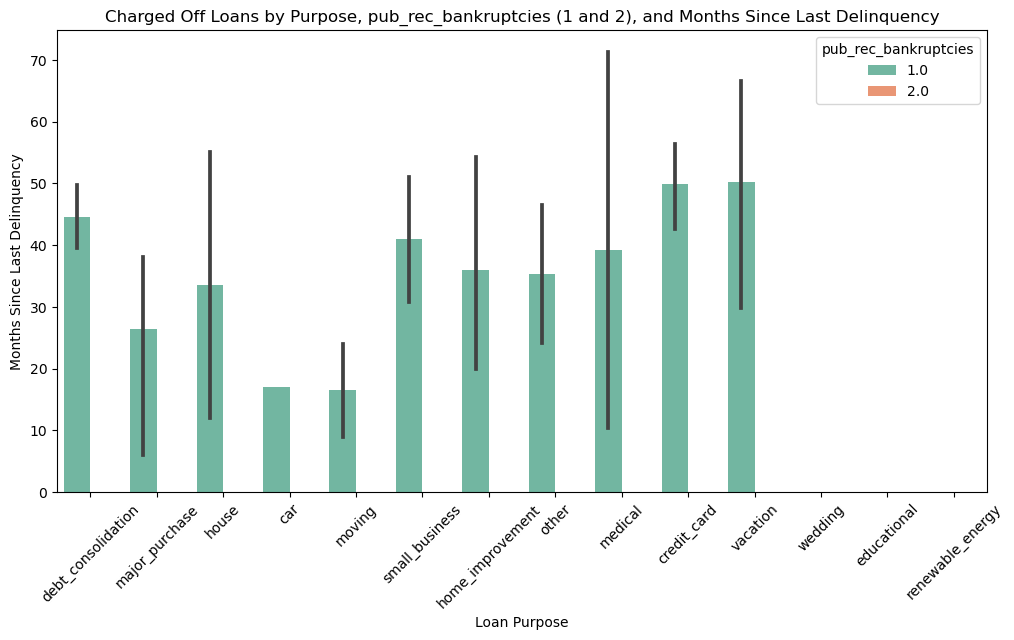

In [70]:
#Another Proof of above chart with integration to "Months since last delinquency" reaffirms the data that "debt consolidation"
#is the most risky while "Medical" loans result in lesser defaulters and delinquency

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only 'Charged Off' loan statuses and 'pub_rec_bankruptcies' values of 1 and 2
charged_off_df = df[(df['loan_status'] == 'Charged Off') & (df['pub_rec_bankruptcies'].isin([1, 2]))]

# Create a bar plot to visualize the distribution of 'Charged Off' loans by purpose, color encoded by 'pub_rec_bankruptcies' and 'mths_since_last_delinq'
plt.figure(figsize=(12, 6))
sns.barplot(x='purpose', y='mths_since_last_delinq', data=charged_off_df, hue='pub_rec_bankruptcies', palette='Set2')

# Add labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Months Since Last Delinquency')
plt.title('Charged Off Loans by Purpose, pub_rec_bankruptcies (1 and 2), and Months Since Last Delinquency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to show the relationship between colors and 'pub_rec_bankruptcies' values
plt.legend(title='pub_rec_bankruptcies', loc='upper right')

plt.show()


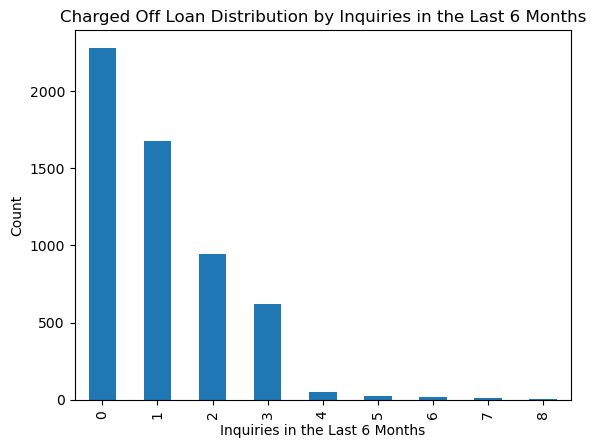

In [71]:
#Borrowers doing inqueries or reaching out are less likely to make losses.

# Filter the dataset to include only "Charged Off" loans
charged_off_data = df[df['loan_status'] == 'Charged Off']

# Group the filtered data by 'inq_last_6mths' and count the occurrences
grouped = charged_off_data.groupby('inq_last_6mths').size()

# Plot the bar chart
grouped.plot(kind='bar')
plt.title('Charged Off Loan Distribution by Inquiries in the Last 6 Months')
plt.xlabel('Inquiries in the Last 6 Months')
plt.ylabel('Count')

plt.show()